<a href="https://colab.research.google.com/github/a-donat/Benchmarks_PyCaret/blob/main/Predicting_Abalone_Age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Set-Up

## I.A. Import Libraries and Download Data

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d gauravduttakiit/abalone-age-prediction
! unzip '/content/abalone-age-prediction.zip' -d '/content/data'

In [ ]:
! pip install pycaret

In [3]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#import VisualizeDataAbbrev as viz

import numpy as np
import pandas as pd
from pycaret.regression import *
from sklearn.model_selection import train_test_split

## I.B. Load Data and Check Data Integrity

In [48]:
ds_df = pd.read_csv("/content/data/train_dataset.csv")

In [49]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   length          3550 non-null   int64  
 1   diameter        3550 non-null   int64  
 2   height          3550 non-null   int64  
 3   whole-weight    3550 non-null   float64
 4   shucked-weight  3550 non-null   float64
 5   viscera-weight  3550 non-null   float64
 6   shell-weight    3550 non-null   float64
 7   sex_F           3550 non-null   int64  
 8   sex_I           3550 non-null   int64  
 9   sex_M           3550 non-null   int64  
 10  rings           3550 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 305.2 KB


In [50]:
ds_df.nunique()

length             134
diameter           111
height              51
whole-weight      2221
shucked-weight    1438
viscera-weight     857
shell-weight       878
sex_F                2
sex_I                2
sex_M                2
rings               27
dtype: int64

In [51]:
ds_df.corr().round(2)

,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,sex_F,sex_I,sex_M,rings
length,1.00,0.99,0.82,0.93,0.90,0.90,0.90,0.31,-0.55,0.24,0.56
diameter,0.99,1.00,0.82,0.93,0.90,0.90,0.91,0.32,-0.57,0.24,0.58
height,0.82,0.82,1.00,0.81,0.77,0.79,0.81,0.30,-0.51,0.21,0.55
whole-weight,0.93,0.93,0.81,1.00,0.97,0.97,0.96,0.30,-0.56,0.25,0.54
shucked-weight,0.90,0.90,0.77,0.97,1.00,0.93,0.89,0.27,-0.52,0.25,0.43
viscera-weight,0.90,0.90,0.79,0.97,0.93,1.00,0.91,0.31,-0.56,0.24,0.51
shell-weight,0.90,0.91,0.81,0.96,0.89,0.91,1.00,0.31,-0.55,0.24,0.63
sex_F,0.31,0.32,0.30,0.30,0.27,0.31,0.31,1.00,-0.46,-0.51,0.25
sex_I,-0.55,-0.57,-0.51,-0.56,-0.52,-0.56,-0.55,-0.46,1.00,-0.53,-0.44
sex_M,0.24,0.24,0.21,0.25,0.25,0.24,0.24,-0.51,-0.53,1.00,0.19



# II. Preprocessing

In [52]:
train_df, test_df = train_test_split(
    ds_df, test_size=0.20, random_state=1)

# III. Create Models

In [53]:
reg_models = setup(data=train_df, target="rings", session_id=123,
                   ignore_features=["sex_M"])


,Description,Value
0,Session id,123
1,Target,rings
2,Target type,Regression
3,Original data shape,"(2840, 11)"
4,Transformed data shape,"(2840, 10)"
5,Transformed train set shape,"(1987, 10)"
6,Transformed test set shape,"(853, 10)"
7,Ignore features,1
8,Numeric features,9
9,Preprocess,True


In [54]:
best_model = compare_models(fold=5)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.5789,4.9148,2.2132,0.5286,0.1814,0.1585,0.5320
rf,Random Forest Regressor,1.5670,4.9249,2.2182,0.5255,0.1814,0.1570,0.9200
lr,Linear Regression,1.6048,4.9620,2.2248,0.5252,0.1825,0.1618,0.8440
ridge,Ridge Regression,1.6049,4.9620,2.2248,0.5252,0.1825,0.1618,0.0560
br,Bayesian Ridge,1.6082,4.9696,2.2266,0.5244,0.1826,0.1621,0.0620
gbr,Gradient Boosting Regressor,1.5647,5.0286,2.2396,0.5181,0.1814,0.1558,0.4000
knn,K Neighbors Regressor,1.6025,5.1069,2.2564,0.5122,0.1850,0.1584,0.1140
lightgbm,Light Gradient Boosting Machine,1.5965,5.0966,2.2560,0.5110,0.1833,0.1585,0.5400
en,Elastic Net,1.6472,5.1299,2.2617,0.5098,0.1867,0.1670,0.0620
lasso,Lasso Regression,1.6614,5.2208,2.2811,0.5018,0.1897,0.1691,0.0640


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

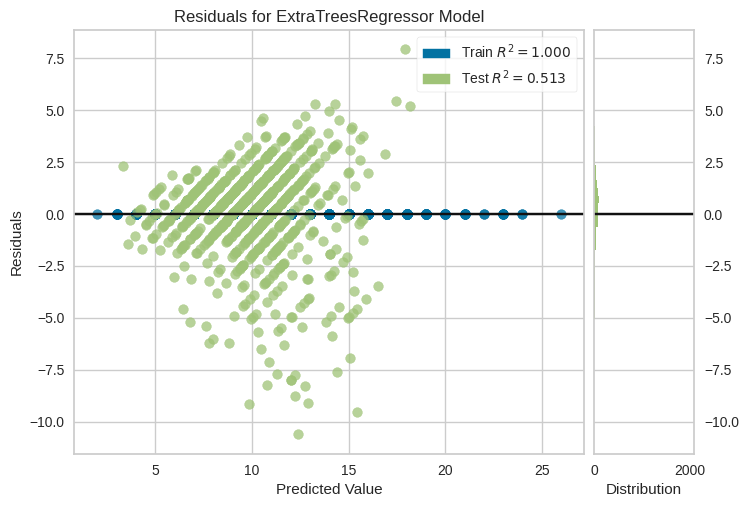

In [55]:
plot_model(best_model)